In [1]:
Sys.setenv(LANG="en_US.UTF-8")
Sys.setenv(LC_ALL="en_US.UTF-8")

In [2]:
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(dplyr))

In [3]:
data <- readRDS(file = "./updated_seurat_clustering/Placenta_seuratobj_merged_final_2021.rds")

data

An object of class Seurat 
30426 features across 101031 samples within 2 assays 
Active assay: integrated (4311 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [4]:
#Set assay to "RNA" to plot the log normalized expression. 
DefaultAssay(data) <- "RNA"

data

An object of class Seurat 
30426 features across 101031 samples within 2 assays 
Active assay: RNA (26115 features)
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

PART-I: Disease signature plotting of villi cell types/states. 

In [6]:
#Subset a cell-type; change ident to 'group' : vSCT1. 
receiver = "vSCT_1"

seurat_obj_receiver= subset(data, idents = receiver) 
seurat_obj_receiver = SetIdent(seurat_obj_receiver, value = seurat_obj_receiver[["group"]])
seurat_obj_receiver


#Further subset late controls & PE. 
subset= c("Late_Villi_C", "Late_Villi_PE")
sct1_data= subset(seurat_obj_receiver, idents = subset) 
table(Idents(sct1_data))

An object of class Seurat 
30426 features across 38908 samples within 2 assays 
Active assay: RNA (26115 features)
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap


 Late_Villi_C Late_Villi_PE 
        18434         18321 

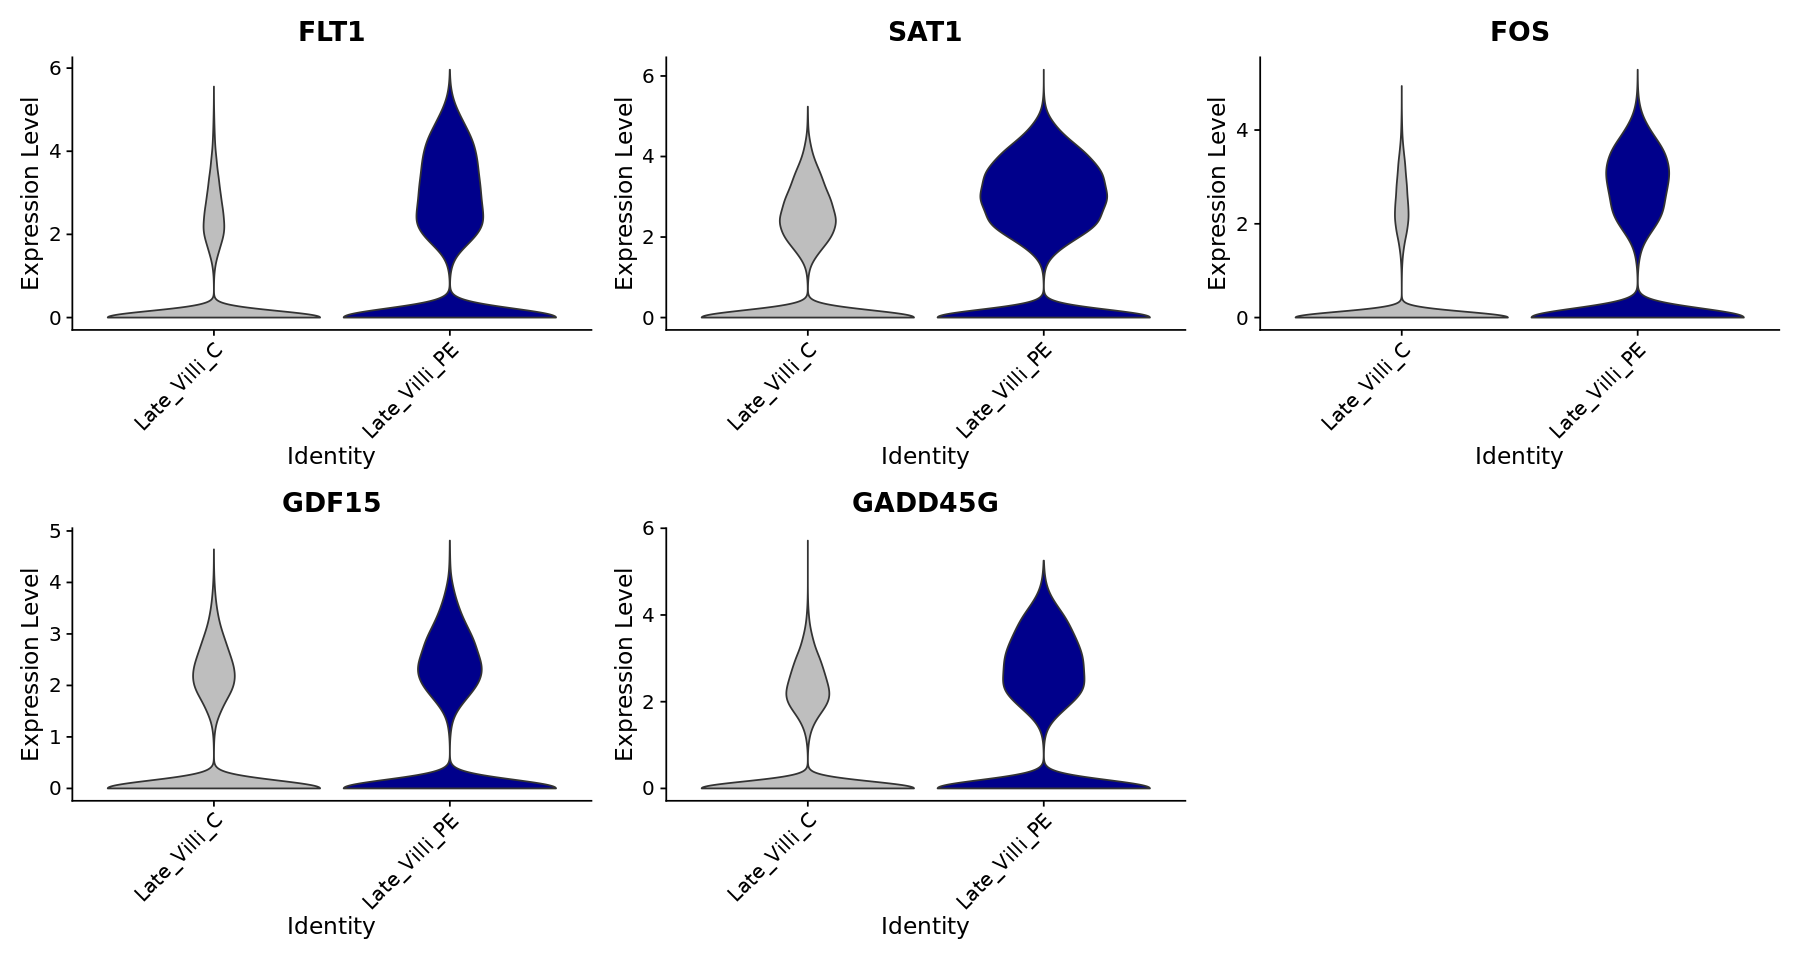

In [11]:
sct1_features= c("FLT1", "SAT1", "FOS", "GDF15", "GADD45G") #DEGs from disease marker analysis

options(repr.plot.width=15, repr.plot.height=8)

VlnPlot(sct1_data, features = sct1_features, group.by= "group", pt.size=0, cols = c("grey", "darkblue"))

#Selected genes are shown in the manuscript panel. 


 Late_Villi_C Late_Villi_PE 
         2451          1914 

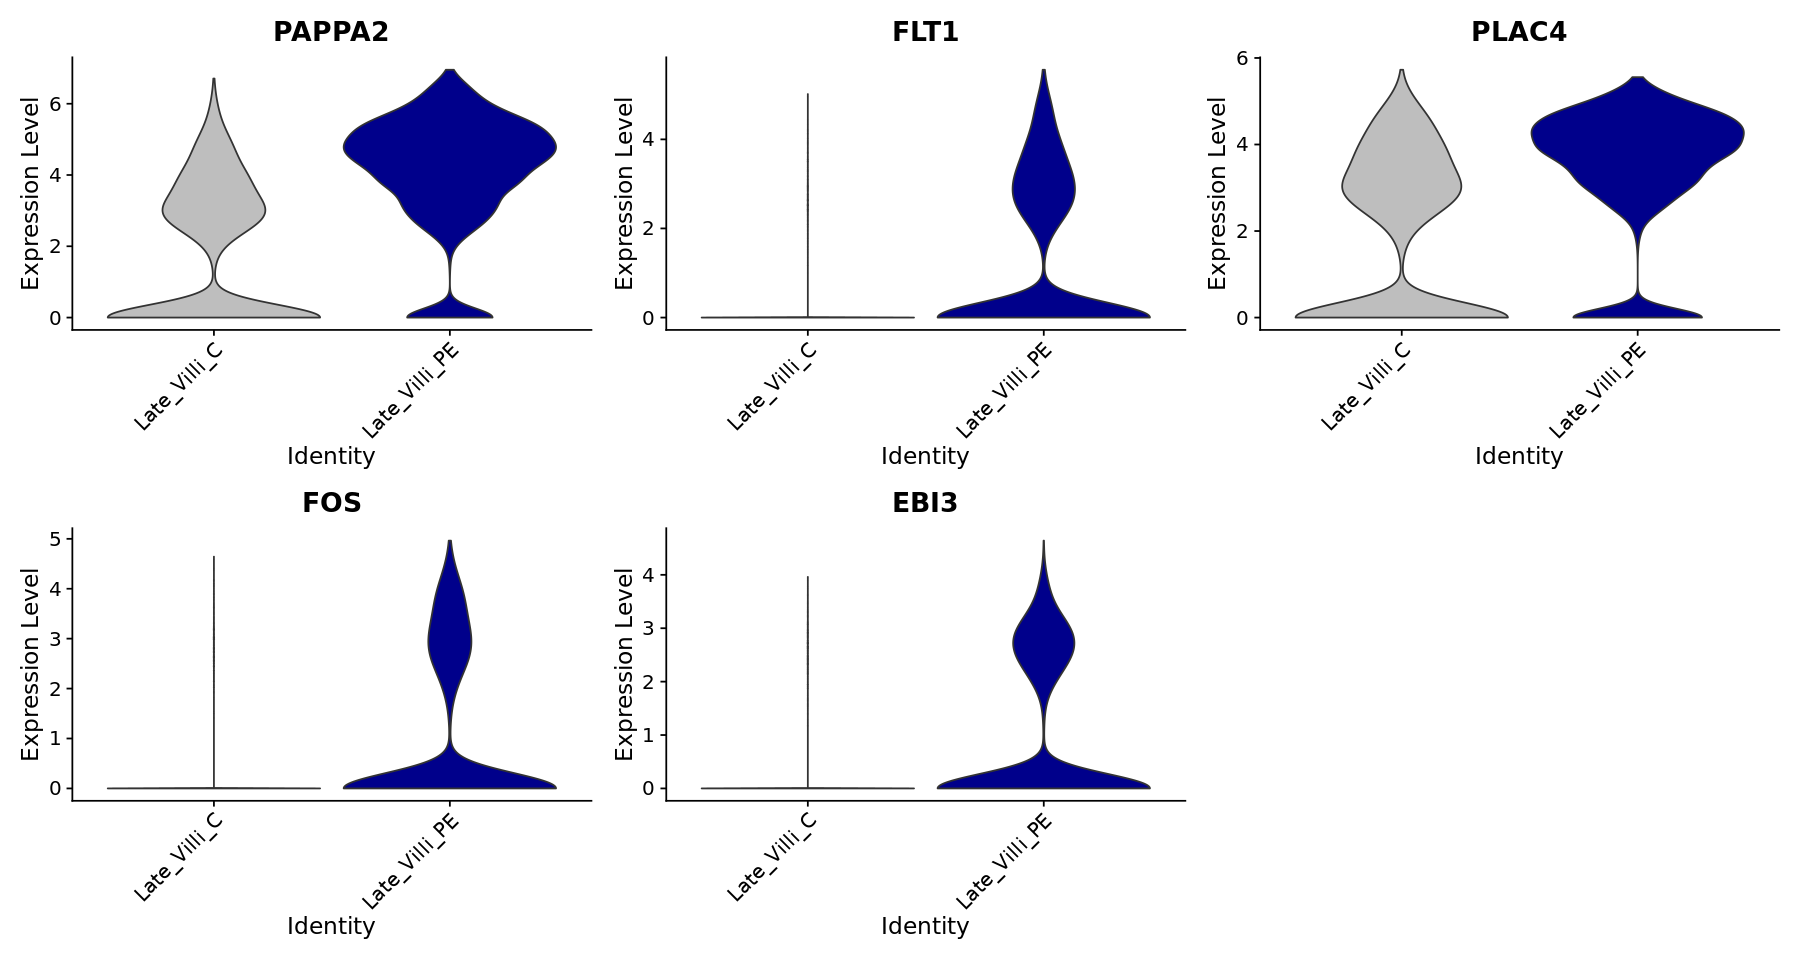

In [12]:
#Disease signature analysis: vSCT_2.
receiver = "vSCT_2"
seurat_obj_receiver= subset(data, idents = receiver) 
seurat_obj_receiver = SetIdent(seurat_obj_receiver, value = seurat_obj_receiver[["group"]])


subset= c("Late_Villi_C", "Late_Villi_PE")
sct2_data= subset(seurat_obj_receiver, idents = subset) 
table(Idents(sct2_data))

VlnPlot(sct2_data, features = c("PAPPA2", "FLT1", "PLAC4", "FOS", "EBI3"), group.by= "group", pt.size=0, cols = c("grey", "darkblue"))

In [17]:
options(repr.plot.width=12, repr.plot.height=8)


 Late_Villi_C Late_Villi_PE 
          518           525 

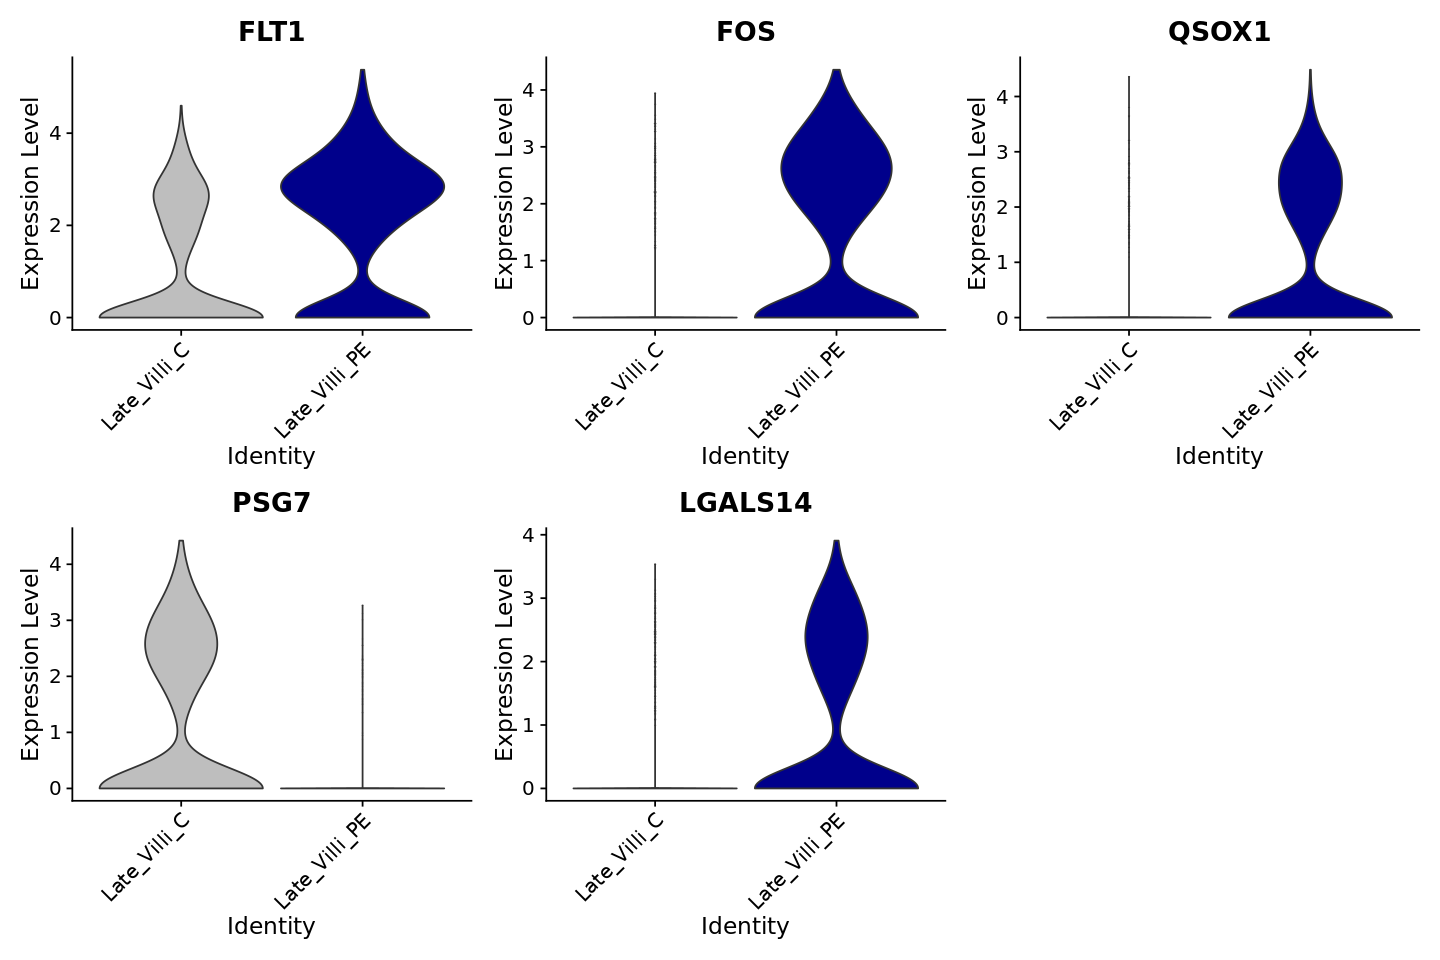

In [19]:
#Disease signature analysis: vtropho_15 (aka "vSCTjuv").
receiver = "vtropho_15"
seurat_obj_receiver= subset(data, idents = receiver) 
seurat_obj_receiver = SetIdent(seurat_obj_receiver, value = seurat_obj_receiver[["group"]])

subset= c("Late_Villi_C", "Late_Villi_PE")
sctjuv_data= subset(seurat_obj_receiver, idents = subset) 
table(Idents(sctjuv_data))

VlnPlot(sctjuv_data, features = c("FLT1", "FOS", "QSOX1", "PSG7", "LGALS14"), group.by= "group", pt.size=0, cols = c("grey", "darkblue"))


 Late_Villi_C Late_Villi_PE 
          671           315 

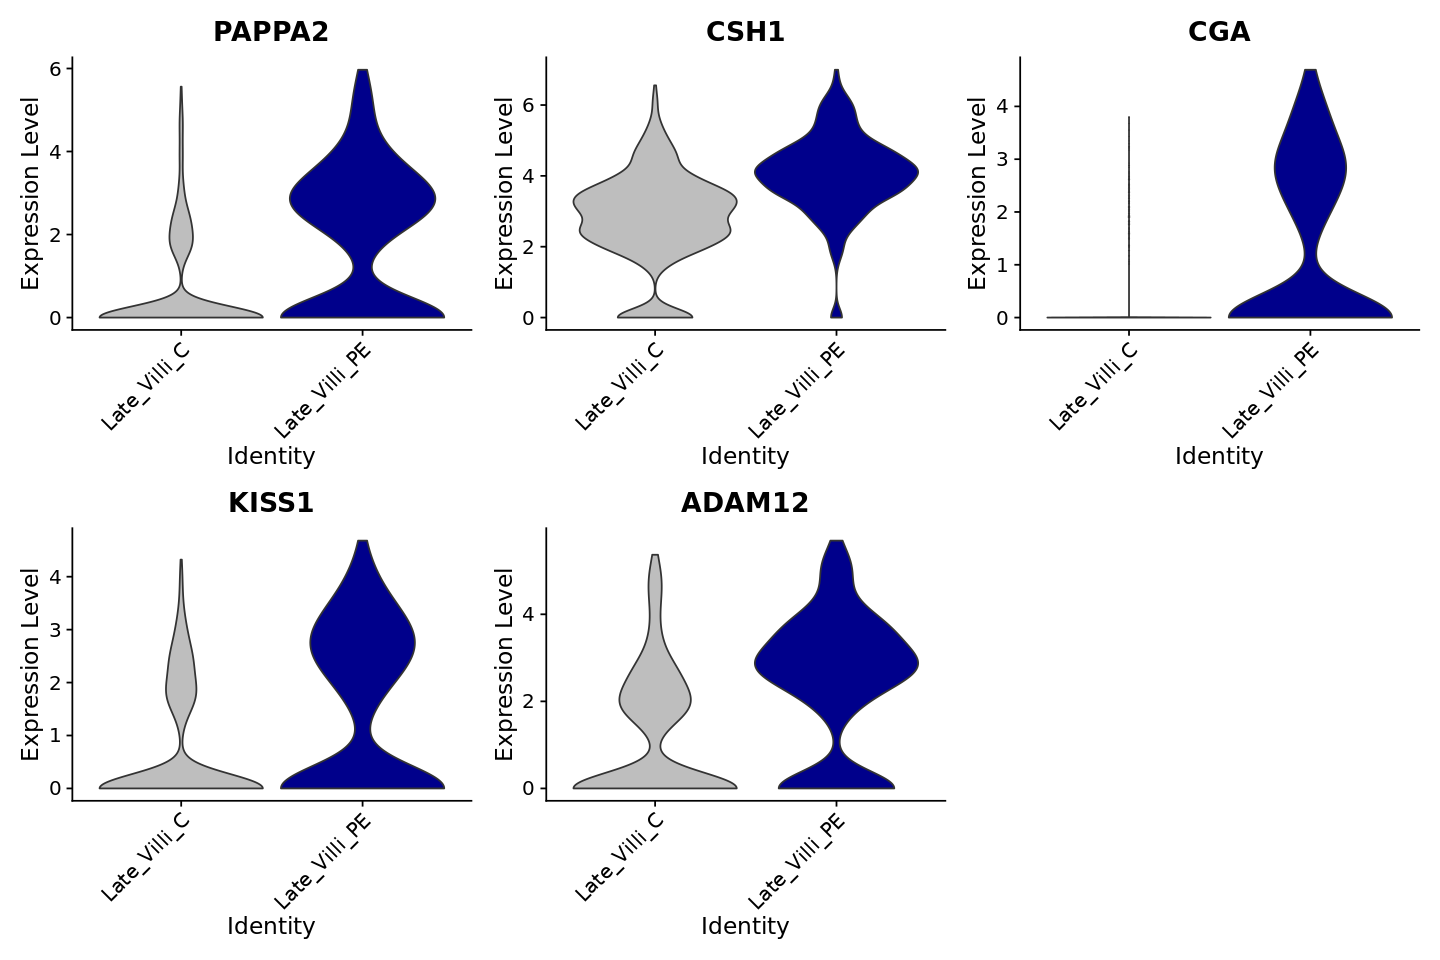

In [20]:
#Disease signature analysis: vVEC (villi vascular endothelial).
receiver = "vVEC"
seurat_obj_receiver= subset(data, idents = receiver) 
seurat_obj_receiver = SetIdent(seurat_obj_receiver, value = seurat_obj_receiver[["group"]])

subset= c("Late_Villi_C", "Late_Villi_PE")
data_sub= subset(seurat_obj_receiver, idents = subset) 
table(Idents(data_sub))

VlnPlot(data_sub, features = c("PAPPA2", "CSH1", "CGA", "KISS1", "ADAM12"), group.by= "group", pt.size=0, cols = c("grey", "darkblue"))


 Late_Villi_C Late_Villi_PE 
         1550           403 

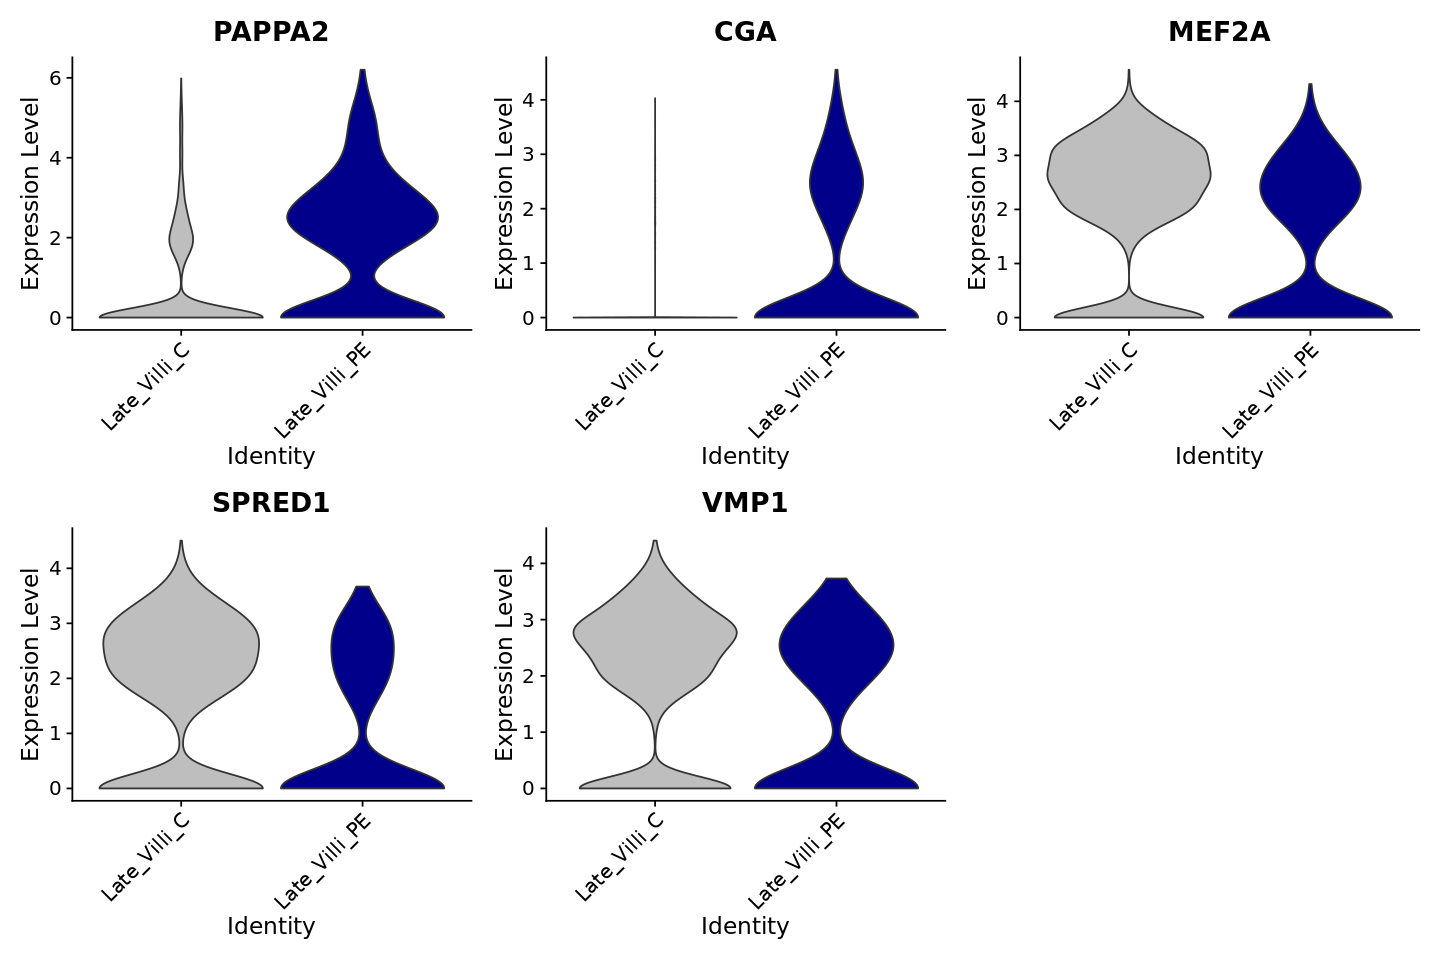

In [21]:
#Disease signature analysis: vHBC.
receiver = "vHBC"
seurat_obj_receiver= subset(data, idents = receiver) 
seurat_obj_receiver = SetIdent(seurat_obj_receiver, value = seurat_obj_receiver[["group"]])

subset= c("Late_Villi_C", "Late_Villi_PE")
data_sub= subset(seurat_obj_receiver, idents = subset) 
table(Idents(data_sub))

VlnPlot(data_sub, features = c("PAPPA2", "CGA", "MEF2A", "SPRED1", "VMP1"), group.by= "group", pt.size=0, cols = c("grey", "darkblue"))


 Late_Villi_C Late_Villi_PE 
          814           320 

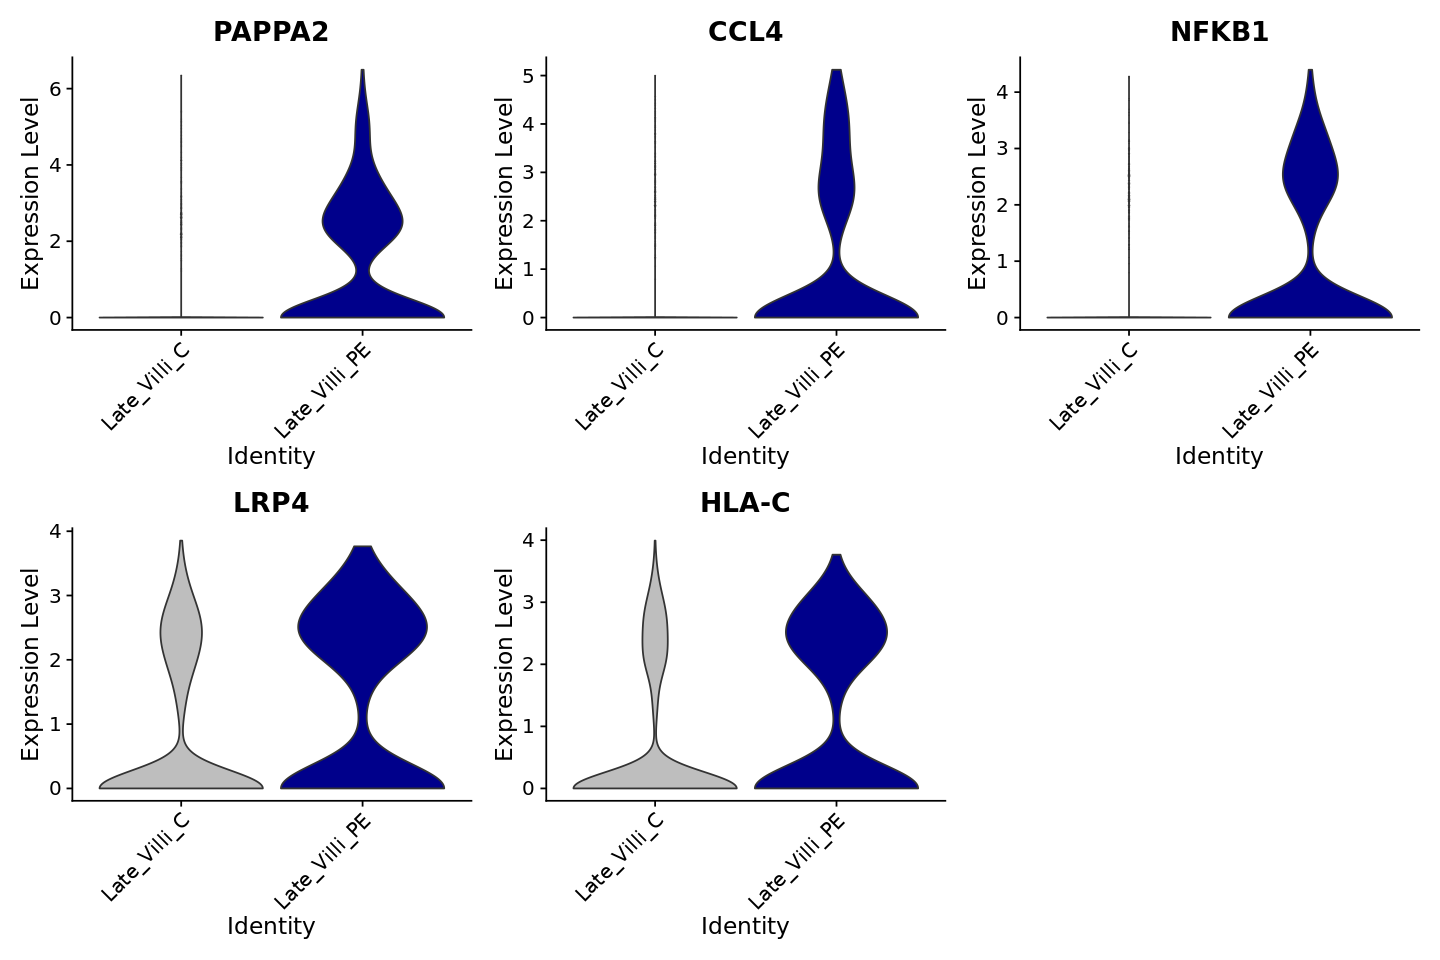

In [22]:
#Disease signature analysis: vTcell.
receiver = "vTcell"
seurat_obj_receiver= subset(data, idents = receiver) 
seurat_obj_receiver = SetIdent(seurat_obj_receiver, value = seurat_obj_receiver[["group"]])

subset= c("Late_Villi_C", "Late_Villi_PE")
data_sub= subset(seurat_obj_receiver, idents = subset) 
table(Idents(data_sub))

VlnPlot(data_sub, features = c("PAPPA2", "CCL4", "NFKB1", "LRP4", "HLA-C"), group.by= "group", pt.size=0, cols = c("grey", "darkblue"))

PART-I: Disease signature plotting of decidua cell types/states.


 Late_Decidua_C Late_Decidua_PE 
            727             475 

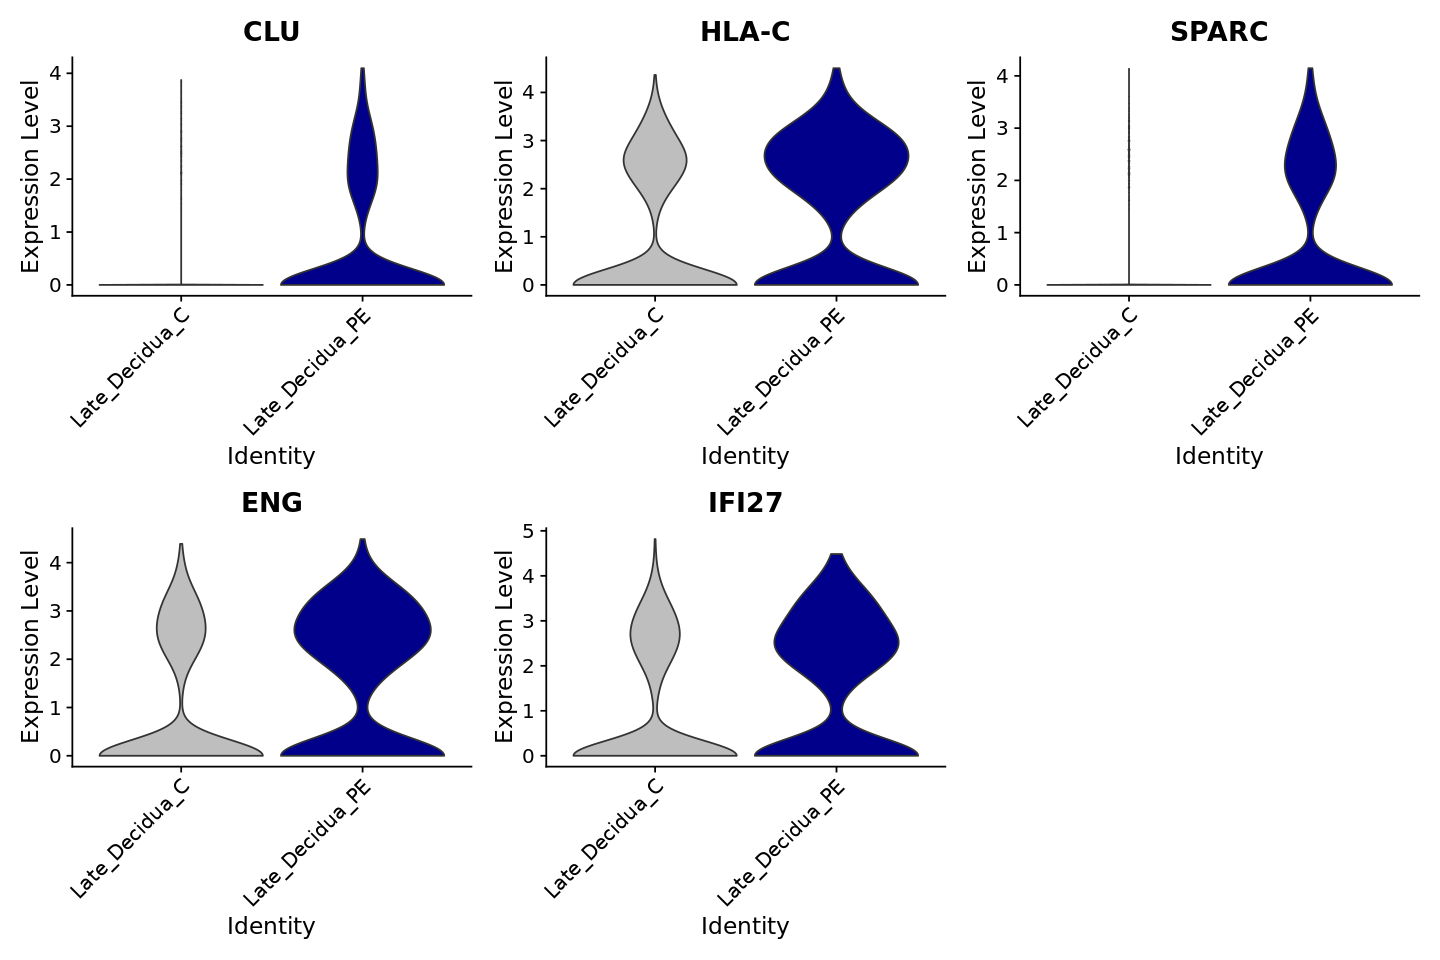

In [24]:
#Disease signature plot: dVEC (decidua vascular endothelial).
receiver = "dVEC"
seurat_obj_receiver= subset(data, idents = receiver) 
seurat_obj_receiver = SetIdent(seurat_obj_receiver, value = seurat_obj_receiver[["group"]])

subset= c("Late_Decidua_C", "Late_Decidua_PE")
data_sub= subset(seurat_obj_receiver, idents = subset) 
table(Idents(data_sub))

VlnPlot(data_sub, features = c("CLU", "HLA-C", "SPARC", "ENG", "IFI27"), group.by= "group", 
        pt.size=0, cols = c("grey", "darkblue"))


 Late_Decidua_C Late_Decidua_PE 
           1229            1483 

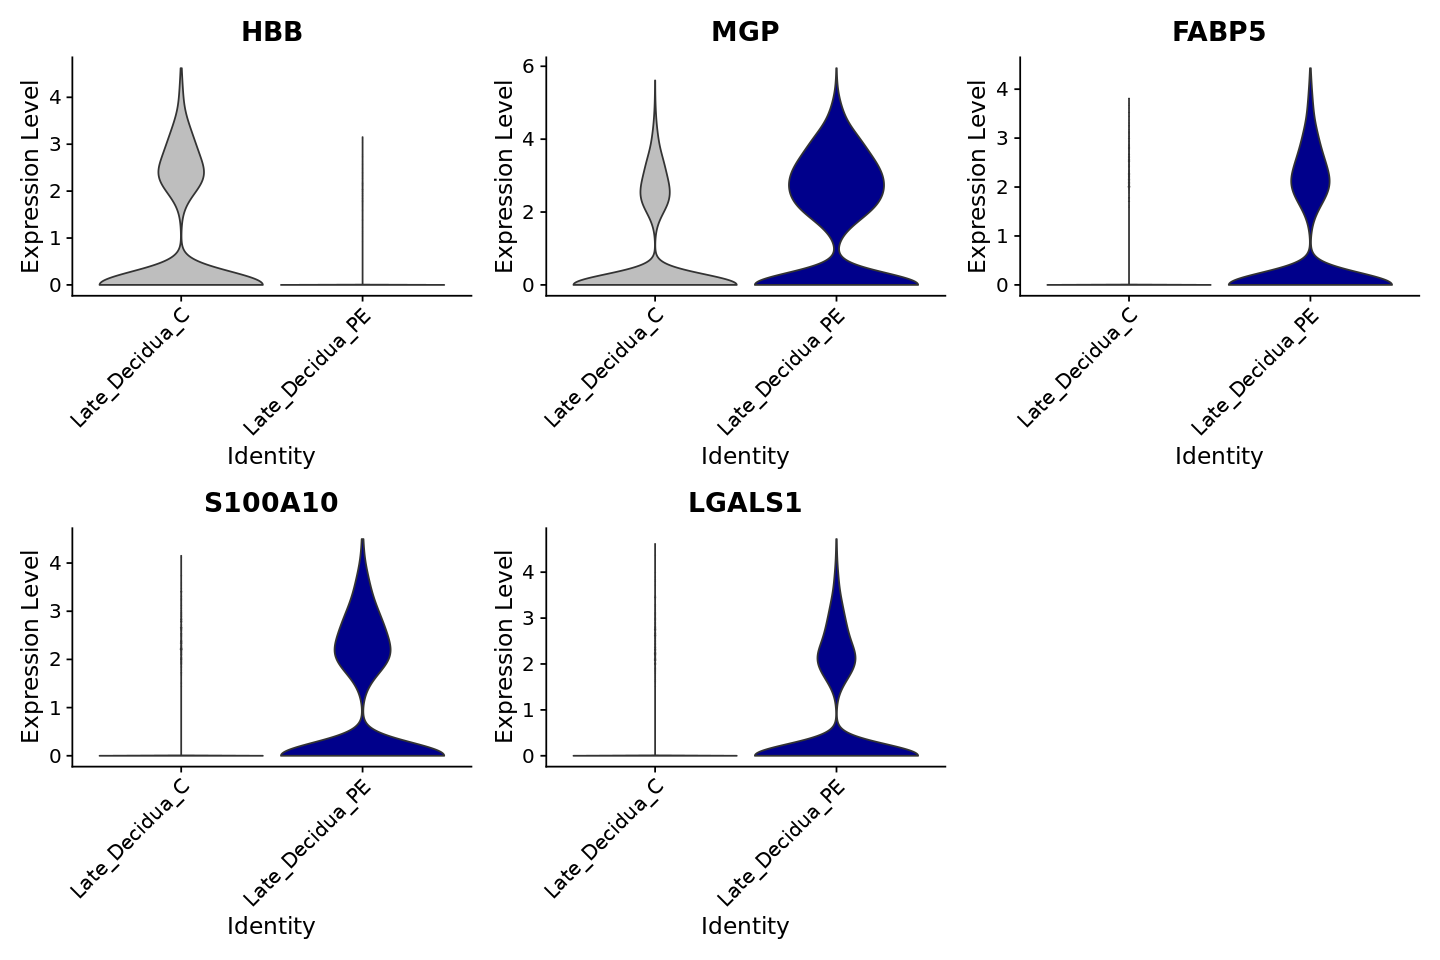

In [25]:
receiver = "dLEC" #decidua lymphatic endothelial.
seurat_obj_receiver= subset(data, idents = receiver) 
seurat_obj_receiver = SetIdent(seurat_obj_receiver, value = seurat_obj_receiver[["group"]])

subset= c("Late_Decidua_C", "Late_Decidua_PE")
data_sub= subset(seurat_obj_receiver, idents = subset) 
table(Idents(data_sub))

VlnPlot(data_sub, features = c("HBB", "MGP", "FABP5", "S100A10", "LGALS1"), group.by= "group", 
        pt.size=0, cols = c("grey", "darkblue"))


 Late_Decidua_C Late_Decidua_PE 
           1510            2214 

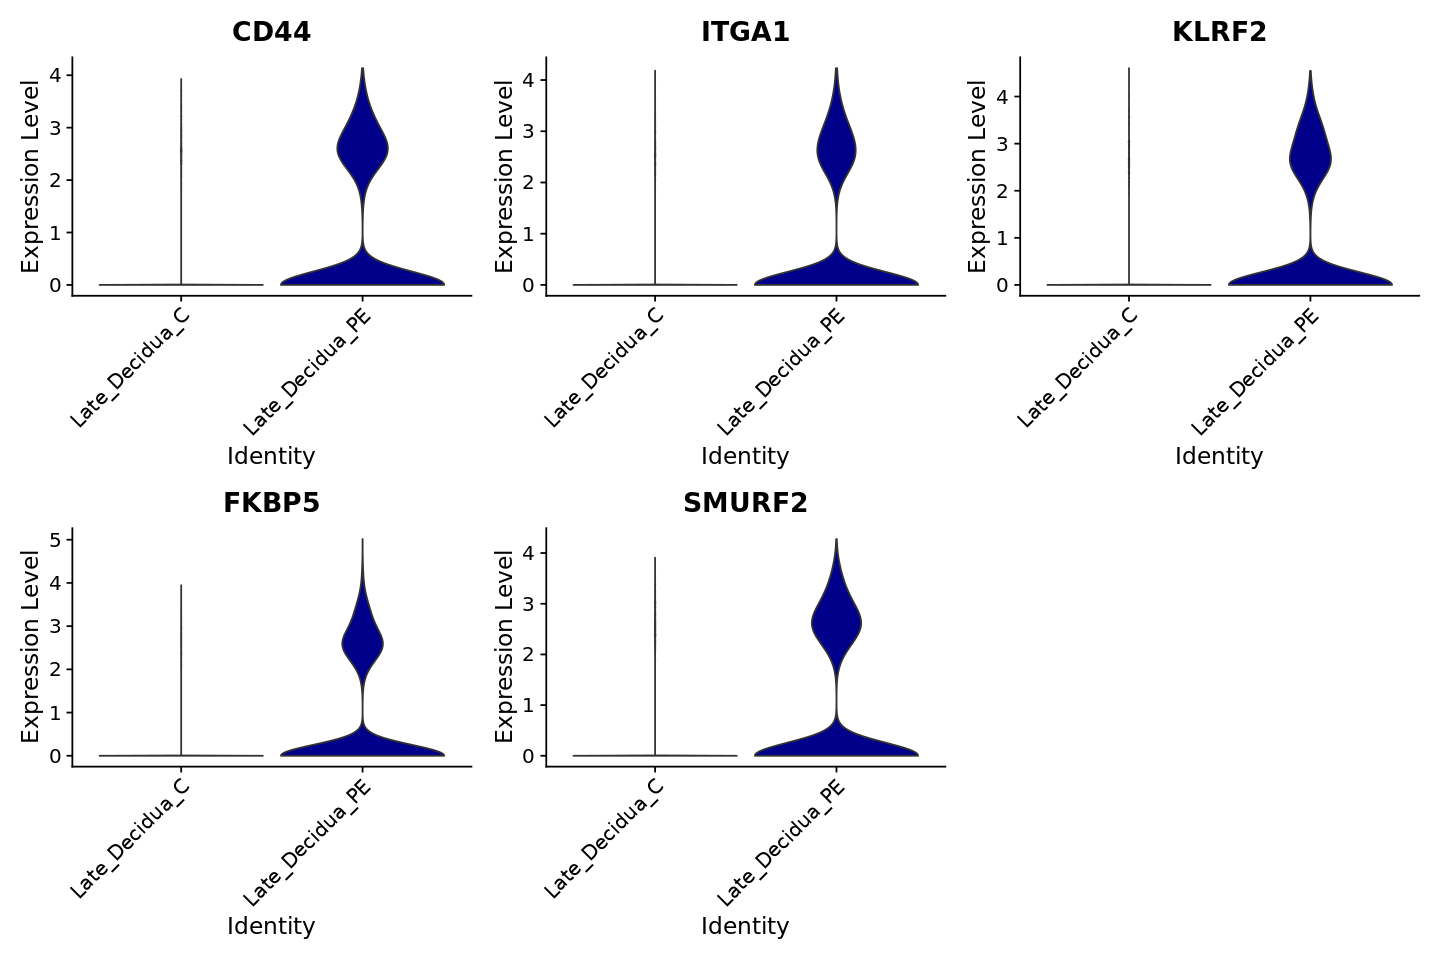

In [26]:
receiver = "dNK_1" #decidua Natural Killer cells (type dNK1).
seurat_obj_receiver= subset(data, idents = receiver) 
seurat_obj_receiver = SetIdent(seurat_obj_receiver, value = seurat_obj_receiver[["group"]])

subset= c("Late_Decidua_C", "Late_Decidua_PE")
data_sub= subset(seurat_obj_receiver, idents = subset) 
table(Idents(data_sub))

VlnPlot(data_sub, features = c("CD44", "ITGA1", "KLRF2", "FKBP5", "SMURF2"), group.by= "group", pt.size=0, cols = c("grey", "darkblue"))


 Late_Decidua_C Late_Decidua_PE 
           1134            1317 

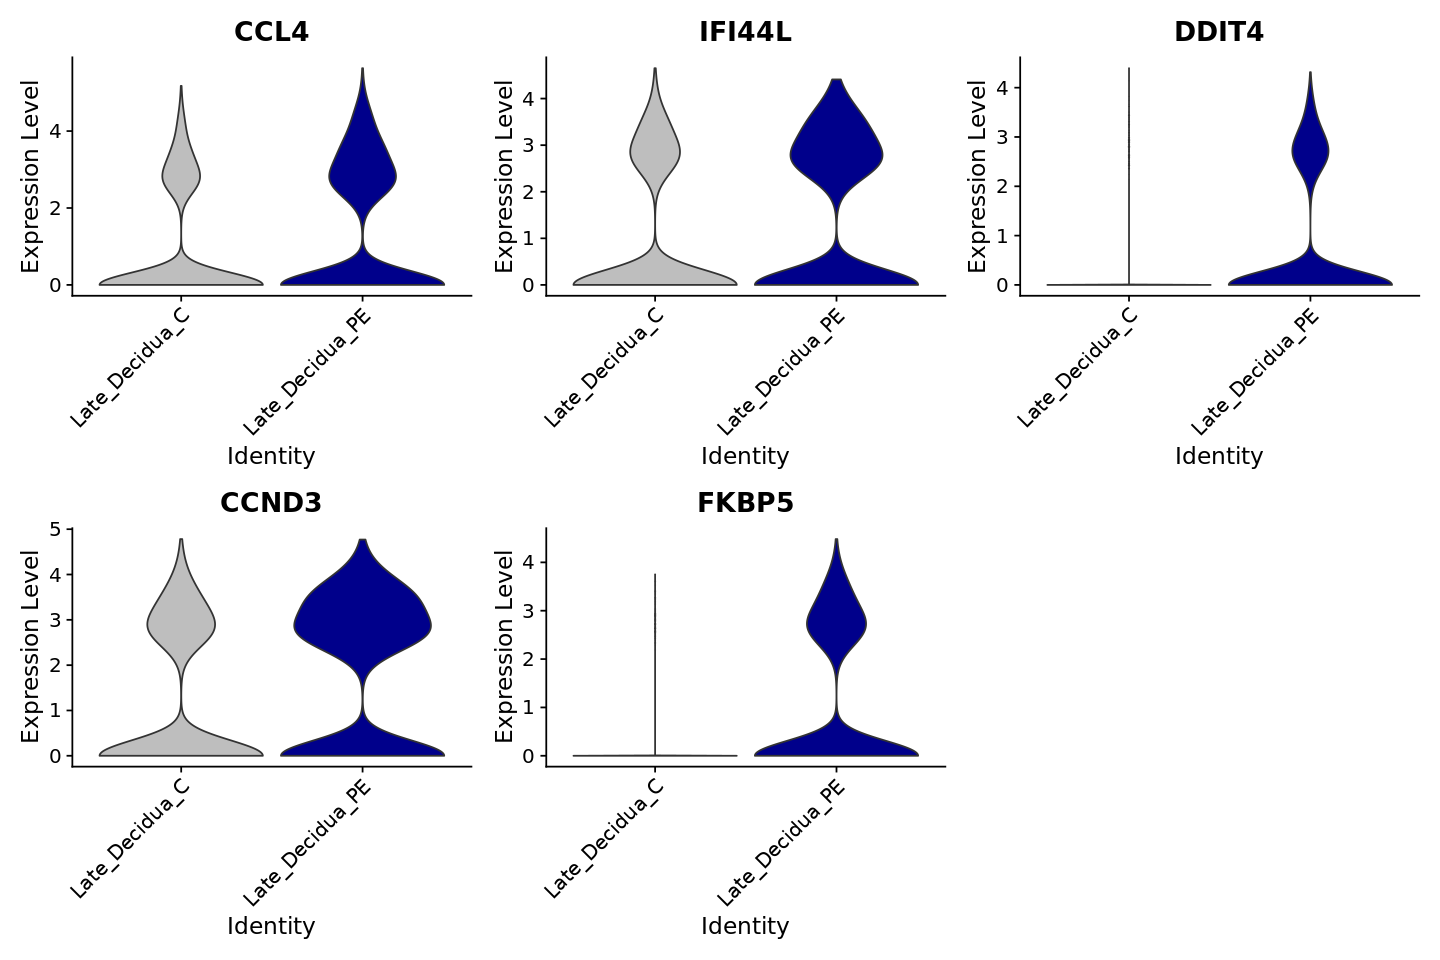

In [27]:
receiver = "dNK_2" #decidua Natural Killer cells (type dNK2).
seurat_obj_receiver= subset(data, idents = receiver) 
seurat_obj_receiver = SetIdent(seurat_obj_receiver, value = seurat_obj_receiver[["group"]])

subset= c("Late_Decidua_C", "Late_Decidua_PE")
data_sub= subset(seurat_obj_receiver, idents = subset) 
table(Idents(data_sub))

VlnPlot(data_sub, features = c("CCL4", "IFI44L", "DDIT4", "CCND3", "FKBP5"), group.by= "group", pt.size=0, cols = c("grey", "darkblue"))


 Late_Decidua_C Late_Decidua_PE 
           2332            2094 

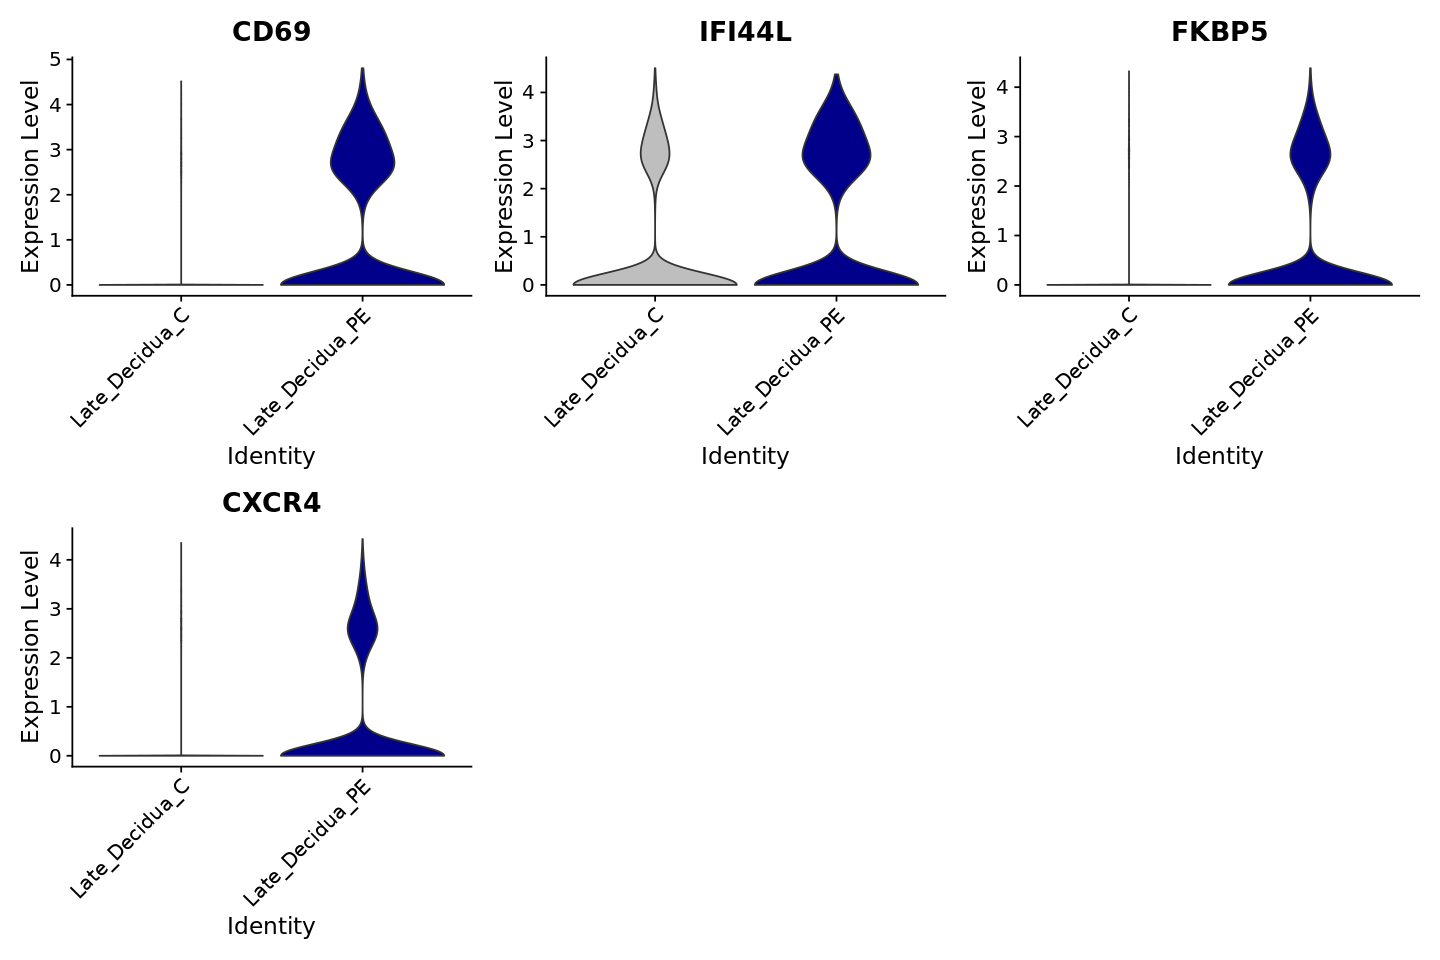

In [28]:
receiver = "dTcell" 
seurat_obj_receiver= subset(data, idents = receiver) 
seurat_obj_receiver = SetIdent(seurat_obj_receiver, value = seurat_obj_receiver[["group"]])

subset= c("Late_Decidua_C", "Late_Decidua_PE")
data_sub= subset(seurat_obj_receiver, idents = subset) 
table(Idents(data_sub))

VlnPlot(data_sub, features = c("CD69", "IFI44L", "FKBP5", "CXCR4"), group.by= "group", pt.size=0, cols = c("grey", "darkblue"))


 Late_Decidua_C Late_Decidua_PE 
           1303            1415 

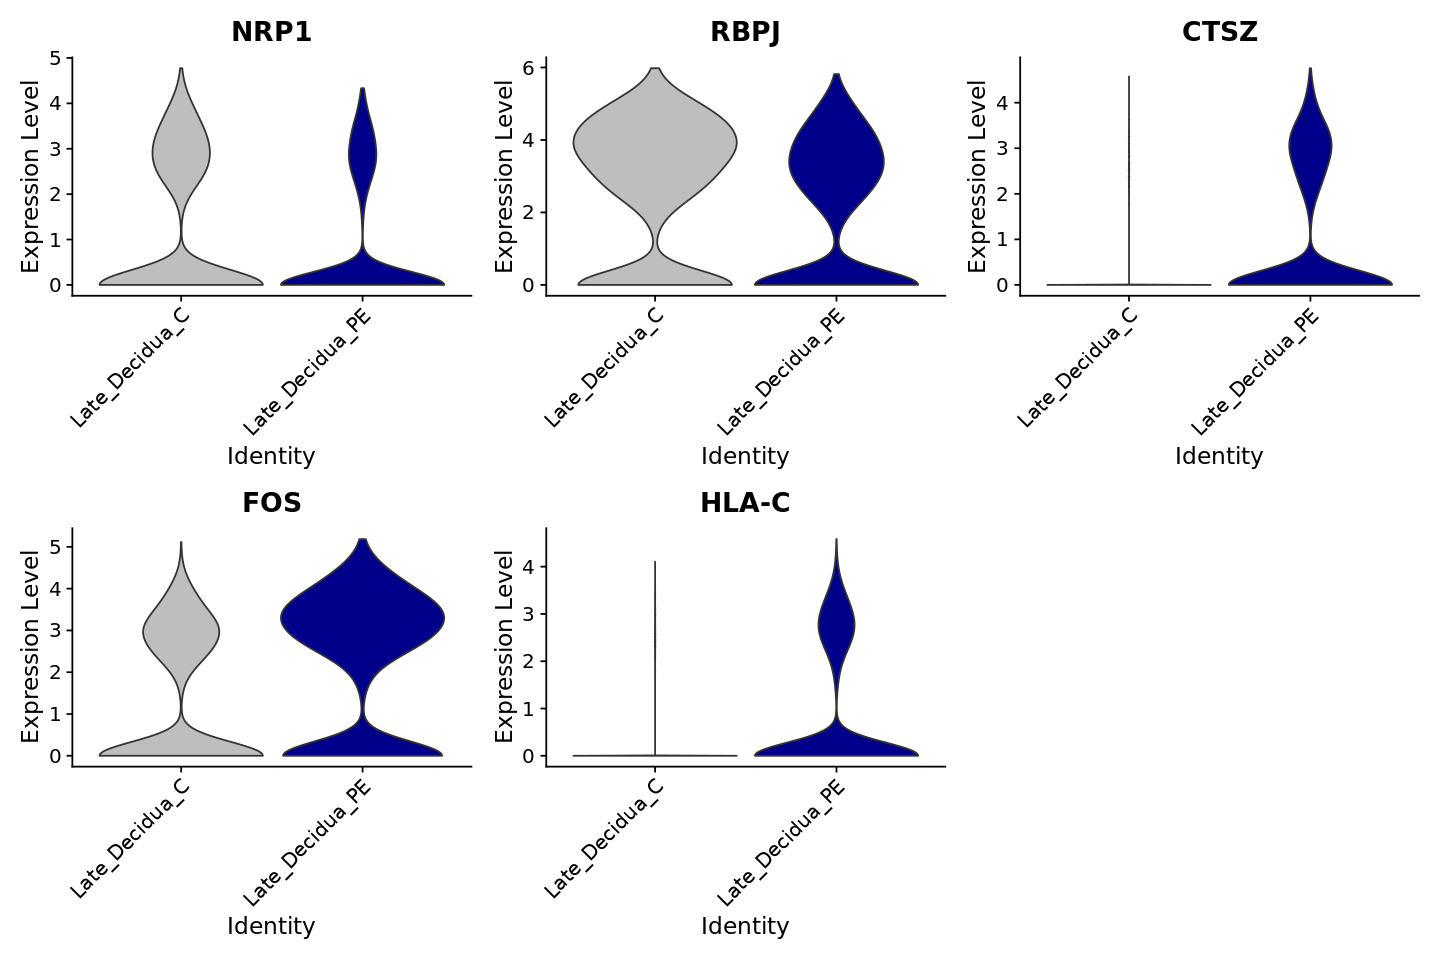

In [29]:
receiver = "dMAC_activated" #Renamed as: dMAC1. 

seurat_obj_receiver= subset(data, idents = receiver) 
seurat_obj_receiver = SetIdent(seurat_obj_receiver, value = seurat_obj_receiver[["group"]])

subset= c("Late_Decidua_C", "Late_Decidua_PE")
data_sub= subset(seurat_obj_receiver, idents = subset) 
table(Idents(data_sub))

VlnPlot(data_sub, features = c("NRP1", "RBPJ", "CTSZ", "FOS", "HLA-C"), group.by= "group", pt.size=0, cols = c("grey", "darkblue"))


 Late_Decidua_C Late_Decidua_PE 
           2763            2108 

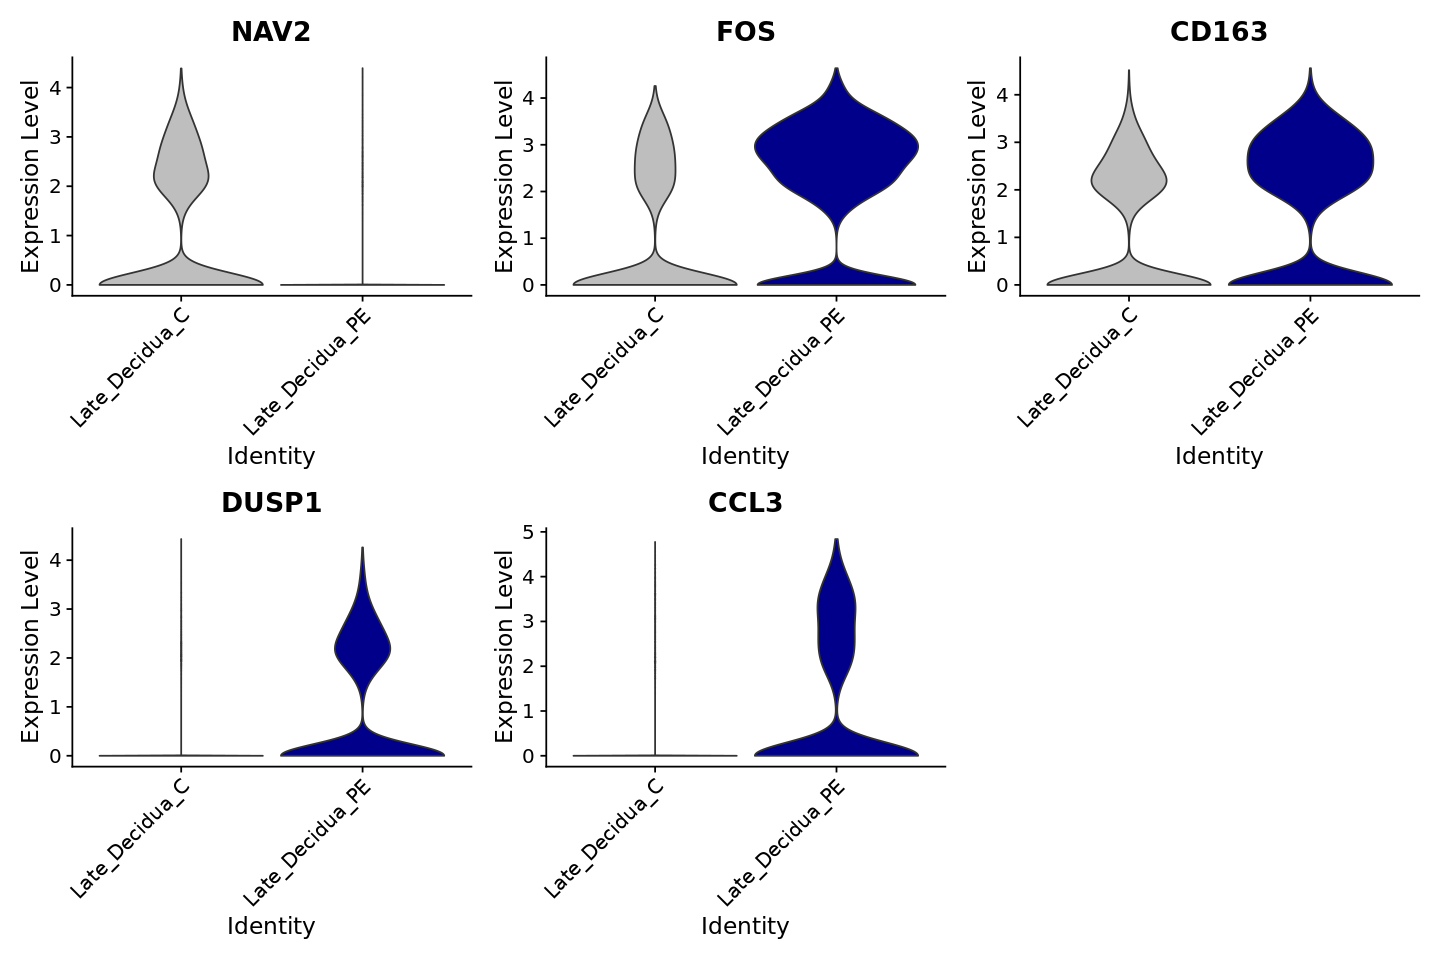

In [30]:
receiver = "dMAC_classical" #Renamed as: dMAC2. 

seurat_obj_receiver= subset(data, idents = receiver) 
seurat_obj_receiver = SetIdent(seurat_obj_receiver, value = seurat_obj_receiver[["group"]])

subset= c("Late_Decidua_C", "Late_Decidua_PE")
data_sub= subset(seurat_obj_receiver, idents = subset) 
table(Idents(data_sub))

VlnPlot(data_sub, features = c("NAV2", "FOS", "CD163", "DUSP1", "CCL3"), group.by= "group", pt.size=0, cols = c("grey", "darkblue"))